In [1]:
from astropy.io import fits
from astropy.stats import sigma_clip
import numpy as np

In [2]:
def create_median_bias(bias_list, median_bias_filename):
    """This function:

    - Accept a list of bias file paths as bias_list.
    - Read each bias file and create a list of 2D numpy arrays.
    - Use a sigma clipping algorithm to combine all the bias frames using
      the median and removing outliers outside 3-sigma for each pixel.
    - Save the resulting median bias frame to a FITS file with the name
      median_bias_filename.
    - Return the median bias frame as a 2D numpy array.

    """
    #Step: Load data (here i will read each relevant FITS file, convert to float 32)
    bias_frames = []
    for filename in bias_list:
        data = fits.getdata(filename).astype('f4')  # convert to float32
        bias_frames.append(data)
    #Step: Make a 3D array (Numpy arrary)
    bias_3d_array = np.array(bias_frames)
    #Step: CLipping (use sigma_clip with median and sigma of 2 or 3)
    sigma_clipped_array = sigma_clip(bias_3d_array, sigma=2.5, axis=0, cenfunc='median')
    #Step: Averagingm (mean of unmasked data)
    median_bias = np.ma.mean(sigma_clipped_array, axis=0).data
    #Step: Saving (median_bias_filename)
    primary = fits.PrimaryHDU(data=median_bias, header=fits.Header())
    hdul = fits.HDUList([primary])
    hdul.writeto(median_bias_filename, overwrite=True)
    #Step: Return reuslt (shoudl return 2d array when called uponm)
    return median_bias

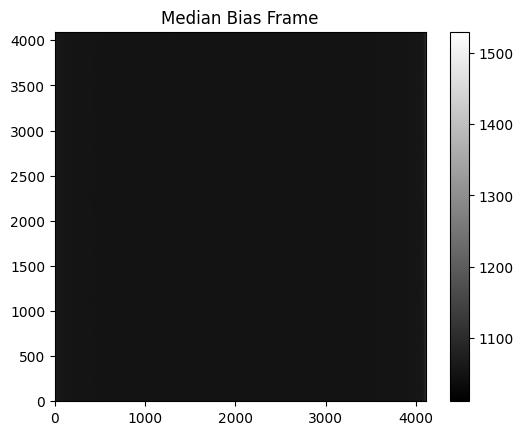

In [3]:
bias_files = [
    '/home/jovyan/work/ccd-reductions-Jbhandol/data/ccd_reductions_data/Bias-S001-R001-C001-NoFilt.fit',
    '/home/jovyan/work/ccd-reductions-Jbhandol/data/ccd_reductions_data/Bias-S001-R001-C002-NoFilt.fit',
    '/home/jovyan/work/ccd-reductions-Jbhandol/data/ccd_reductions_data/Bias-S001-R001-C003-NoFilt.fit',
    '/home/jovyan/work/ccd-reductions-Jbhandol/data/ccd_reductions_data/Bias-S001-R001-C004-NoFilt.fit',
    '/home/jovyan/work/ccd-reductions-Jbhandol/data/ccd_reductions_data/Bias-S001-R001-C005-NoFilt.fit',
    '/home/jovyan/work/ccd-reductions-Jbhandol/data/ccd_reductions_data/Bias-S001-R001-C006-NoFilt.fit'
]

median_bias = create_median_bias(bias_files, 'bias_median.fits')

# Preview result
import matplotlib.pyplot as plt
plt.imshow(median_bias, cmap='gray', origin='lower')
plt.colorbar()
plt.title("Median Bias Frame")
plt.show()


In [4]:
import os
print(os.getcwd())

/home/jovyan/work/ccd-reductions-Jbhandol/src/ccd


In [5]:
import numpy as np
from astropy.io import fits

# Reuse bias_files from before
print("📂 Individual Bias Frame Statistics:")
print("-" * 40)

for file in bias_files:
    data = fits.getdata(file).astype('f4')
    print(f"{file.split('/')[-1]}:  Mean = {np.mean(data):.2f},  Median = {np.median(data):.2f},  Std = {np.std(data):.2f}")

# Now for the median bias image
print("\n📦 Combined Median Bias Image Statistics:")
print("-" * 40)

mean = np.mean(median_bias)
median = np.median(median_bias)
std = np.std(median_bias)

print(f"bias_median.fits:  Mean = {mean:.2f},  Median = {median:.2f},  Std = {std:.2f}")


📂 Individual Bias Frame Statistics:
----------------------------------------
Bias-S001-R001-C001-NoFilt.fit:  Mean = 1052.63,  Median = 1052.00,  Std = 9.87
Bias-S001-R001-C002-NoFilt.fit:  Mean = 1052.65,  Median = 1052.00,  Std = 9.88
Bias-S001-R001-C003-NoFilt.fit:  Mean = 1052.48,  Median = 1052.00,  Std = 9.87
Bias-S001-R001-C004-NoFilt.fit:  Mean = 1052.43,  Median = 1052.00,  Std = 9.88
Bias-S001-R001-C005-NoFilt.fit:  Mean = 1052.33,  Median = 1052.00,  Std = 9.87
Bias-S001-R001-C006-NoFilt.fit:  Mean = 1052.19,  Median = 1052.00,  Std = 9.86

📦 Combined Median Bias Image Statistics:
----------------------------------------
bias_median.fits:  Mean = 1052.44,  Median = 1052.00,  Std = 6.35
